## PART 04-2) Pandas Part 2
- https://pandas.pydata.org/pandas-docs/stable/reference/index.html

## 0.Ready

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/data')
print(os.getcwd())

/content/drive/My Drive/Colab Notebooks/data


In [ ]:
import pandas as pd
import numpy as np
import shelve

## 1.데이터 전처리
- 처리가 필요한 데이터
   - 누락 데이터(NA) -> 누락 데이터 처리
   - 타입이 올바르지 않은 데이터 -> 데이터 타입 변경
   - 콤마, 공백, 모호한 대/소문자 사용 -> 콤마, 공백 제거, 대/소문자 변경
   - 의미 없는 데이터 -> 의미 없는 데이터 선별 및 제거
- https://pandas.pydata.org/pandas-docs/version/0.25/user_guide/missing_data.html   

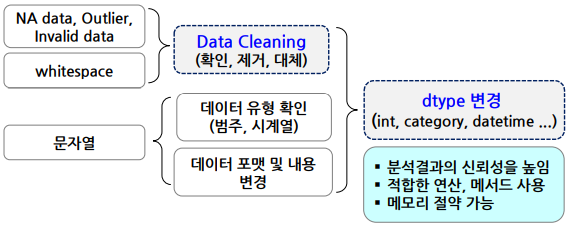

### 1-01. NA(Missing data)의 종류
- None, np.nan, pd.NaT
    - np.nan : float 타입으로 숫자의 missing을 의미
    - pd.NaT : np.datetime64 타입으로 날짜의 missing을 의미
    - np.inf : pd.options.mode.use_inf_as_na = True를 하면 missing data 취급

In [ ]:
pd.options.mode.use_inf_as_na = False
s = pd.Series([np.nan, pd.NaT, None, np.inf])
s

0     NaN
1     NaT
2    None
3     inf
dtype: object

In [ ]:
# NA는 제외하고 처리함 
print(s.count(), s.sum())    

1 inf


### 1-02. NA 데이터의 상등 비교
- None, np.inf 는 상등 비교가 가능함
- np.nan, pd.NaT는 상등 비교가 불가능함 (isna() 함수를 사용함)

In [ ]:
print(f'None   : {None == None}',
      f'np.inf : {np.inf == np.inf}',
      f'np.nan : {np.nan == np.nan}',
      f'pd.NaT : {pd.NaT == pd.NaT}',
      sep='\n')

None   : True
np.inf : True
np.nan : False
pd.NaT : False


In [ ]:
# isna() 함수를 사용하여 NA 인지 아닌지 확인 가능
pd.options.mode.use_inf_as_na = True
s = pd.Series([np.nan, pd.NaT, None, np.inf])
s.isna()

0    True
1    True
2    True
3    True
dtype: bool

### 1-03. NA 정보 확인
- df.info()
   - index, columns, dtypes, memory usage 정보 출력
   - 출력 정보의 정도를 조절할 수 있는 parameters가 있음
   - memory_usage='deep', deep memory introspection 설정
   - [DataFrame.info()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html)
- df.isna()
   - Boolean 데이터로 작성된 DataFrame 객체 반환 (NA value => True)
   - isna, isnull은 동일 동작 (isnull 는 isna 의 alias)
   - any(), all() 등으로 정보를 요약 할 수 있음
   - df.isna().any()
   - df.isna().all()
   - df.isna().any().any()
   - [DataFrame.isna()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html)
- df.any(axis=0) 
   - column 별로 값이 하나라도 True인 경우 True, 아니면 False
   - axis = 1로 하면, row 별로 확인
- df.all(axis=0)
   - column 별로 모든 값이 True인 경우 True, 아니면 False
   - axis = 1로 하면, row 별로 확인   

In [ ]:
df = pd.read_csv('easySample2.csv')
df

In [ ]:
# df.info를 사용하여 NA정보 확인
# 총 row의 개수 및 index, column별로 NA아닌 데이터의 개수, 메모리 사용량 등을 확인할 수 있음



In [ ]:
# df.info()함수에 memory_usage='deep'을 사용하여 메모리의 사용량을 확인한다


In [ ]:
df1 = df[['english', 'japanese', 'chinese']]
# df1의 NA data를 확인한다


In [ ]:
# column별 NA data 확인 - isna()와 any()를 사용하여 column별로 하나라도 NA가 있으면 True, 아니면 False
# df1의 row별 NA data를 확인한다 (row별로 하나라도 있으면 True)


In [ ]:
# column별 NA data 확인 방법 - isna()와 all()를 사용하여 column별로 모두 NA면 True, 아니면 False
# df1의 row별 NA data를 확인한다 (row별로 모두 NA면 True)


In [ ]:
# DataFrame에 하나라도 NA가 있으면 True


### 1-04. NA 제거
- df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
- axis
   - axis=0 이거나 'index' : NA value 포함 행(row) 제거
   - axis=1 이거나 'columns' : NA value 포함 열(column) 제거
- how
   - how='any' : NA value 가 하나라도 포함된 경우 True
   - how='all' : 모든 값이 NA value 인 경우 True
- thresh
   - int, non-NA value 개수가 설정 값 이상 일 때 제거 안함
- subset 
   - array-like, NA value를 살펴 볼 label 목록
   - axis=0 : columns에 대한 label 을 목록으로 작성함
- inplace
   - bool, True인 경우 대상에 직접 반영 하고, None을 반환

In [ ]:
df = pd.read_csv('easySample2.csv')
df

In [ ]:
# NA data 삭제를 위한 DataFrame 생성
# whitespace로 채워진 셀을 nan으로 변경
df = df.replace(r'^\s+$', np.nan, regex=True)
  
# 0~2번 행, 3~6번 열 선택하여 DataFrame 생성
df = df.iloc[:3, 3:7]                           
df

In [ ]:
# df에 대해 NA가 아닌 것 확인 (NA가 아닌 것 True)


In [ ]:
# df에 대해 NA가 하나라도 포함된 열 제거 


In [ ]:
# df에 대해 NA가 하나라도 포함된 행 제거


In [ ]:
# df의 각 column에 대해 모든 항이 NA인 경우 제거


In [ ]:
# NA가 아닌 값이 3개 이상인 행에 대해 제거 안함


In [ ]:
# dropna의 기준을 'english'와 'japanese'으로 제한하며, 1개라도 NA가 있는 행 제거

df1

In [ ]:
# 1개라도 NA가 있는 행을 제거해서 df 자체를 수정함
# return 값을 저장하여 return이 없음을 확인할 것

print(df2)

### 1-05. NA 채우기
- df.fillna(value=None, method=None, axis=None, inplace=False, limit=None, ... )
- NA value 를 value 또는 method를 사용하여 변경한 DataFrame 객체 반환
- value 
   - scalar, dict, Series, or DataFrame
   - NA values를 대신 할 값을 지정함
   - dict, Series, DataFrame 을 사용해 행/열 별 채우기 값 별도 지정 가능
- method
   - {'backfill', 'bfill', 'pad', 'ffill', None}
   - value=None 일 때, NA values를 대신 할 값 선정 방법을 지정함
   - 'backfill', 'bfill' : (아래->위)다음 발견되는 valid observation으로 채움
   - 'pad', 'ffill' : (위->아래) 이전에 발견된 valid observation으로 채움
- axis
   - axis=0 이거나 'index' : 행 방향으로 채우기 진행
   - axis=1 이거나 'columns' : 열 방향으로 채우기 진행
- inplace
   - bool, True인 경우 대상에 직접 반영 하고, None을 반환
- limit
   - NA values를 다른 value로 변경하는 동작의 최대 횟수

In [ ]:
# 1개라도 NA가 있는 행을 제거해서 df 자체를 수정함


In [ ]:
# DataFrame 준비
df = pd.read_csv('easySample2.csv')
df = df.replace(r'^\s+$', np.nan, regex=True)
df = df.iloc[:6, [4, 6]]  
df.iloc[0,1] = 2
df.iloc[1,1] = 3
df

,english,chinese
0,1,2
1,NaN,3
2,1,NaN
3,NaN,3
4,NaN,NaN
5,NaN,1


In [ ]:
# df의 모든 NA를 0으로 채운다


In [ ]:
# df에서 'english'의 NA는 -1로 채우고, 'chinese'의 NA는 -2로 채운다 (dict 사용)


In [ ]:
df.iloc[2,0] = 2
df.iloc[3,1] = 2
df

In [ ]:
# df에서 NA를 채울 때 '이전에 발견된'값으로 채우는데 2개까지만 채운다


In [ ]:
# df에서 NA를 채울 때 '다음 발견되는'값으로 채운다


### 1-06. Value 대체
- df.replace(to_replace, value=None, inplace=False, limit=None, regex=False,...)
- to_replace로 주어진 대상이 value로 주어진 값으로 변경 된 DataFrame 객체
- to_replace
   - str, regex, list, dict, Series, int, float, or None
   - value로 대체될 값들을 찾는 방법
   - API에서 상세 설명 참조 ([DataFrmae.replace](https://pandas.pydata.org/pandas-docs/version/0.25/reference/api/pandas.DataFrame.replace.html))
- value
   - scalar, dict, list, str, regex, default None
   - to_replace에 매칭하는 값을 대체할 값을 지정함
   - dict 을 사용해 열 별 채우기 값을 별도 지정 가능
- inplace
   - bool, True인 경우 대상에 직접 반영 하고, None을 반환
- limit
   - NA values를 다른 value로 변경하는 동작의 최대 횟수
- regex
   - bool or same types as to_replace
   - True 설정 시 to_replace 및 value의 정규식 사용 가능 
   - to_replace는 str 을 사용해야 함


In [ ]:
df = pd.read_csv('easySample2.csv')
df = df.replace(r'^\s+$', np.nan, regex=True)
df = df[['dept']]
df

In [ ]:
# "Education"을 "E"로 변경


In [ ]:
# "Education", "Marketing", "Sales", "Accounting"을 각각 "E", "M", "S", "A"로 변경  (list 사용)
# list 2개를 사용한다



In [ ]:
# "Education", "Marketing", "Sales", "Accounting"을 각각 0, 1, 2, 3으로 변경  (dict 사용)
# dict를 사용하여 작업하도록 한다 (key가 대상, value가 대체값)


In [ ]:
# "Education", "Marketing", "Sales", "Accounting"을 각각 0, 1, 2, 3으로 변경 (Series 사용)
# Series를 사용하여 작업한다, index가 대상, value가 대체값



In [ ]:
# 도전해 보세요!
df = pd.read_csv('easySample2.csv')
df = df.replace(r'^\s+$', np.nan, regex=True)
df = df[['pname', 'english', 'japanese', 'chinese']]
df.head()

In [ ]:
# NaN 값에 대해서 'english'에서는 0, 'japanese'에서는 4, 'chinese' : 5로 대체하도록 한다


## 2.DataFrame 합치기

### 2-01. pd.concat 
- 여러개 데이터 프레임 하나로 합치기
- pd.concat(objs, axis=0, join=‘outer’, ignore_index=False,verify_integrity=False, ... )
- index를 기준으로, 행/열 방향으로 DataFrame을 병합함
- objs : a sequence or mapping of Series or DataFrame objects
- axis : 0  or 'index' : 행 방향, 1 or 'columns' : 열 방향
- join : { ‘outer’, ‘inner’ }, 매치되는 index/column 없을 때의 동작
   - outer : NaN 채우기, inner : 삭제하기
- ignore_index : index를 무시하고 RangeIndex로 변경
- verity_integrity : True : 중복 데이터 있으면 오류 발생 
- [pandas.concat](https://pandas.pydata.org/pandas-docs/version/0.25/reference/api/pandas.concat.html)  

In [ ]:
import pandas as pd
import numpy as np

df1 = pd.DataFrame( {'A' : np.arange(1,5),
                     'B' : list("opqr") },
                    index = list("abcd") )
df2 = pd.DataFrame( {'A' : [5, 6, 7],
                     'B' : list("stu")},
                   index= list("efg") )
df3 = pd.DataFrame( {'C' : [10,20,15,40],
                     'D' : list("QXYZ") },
                    index = list("abcd") ) 
df4 = pd.DataFrame( {'A' : [1,20,15],
                     'B' : list("xyz") },
                    index = list("abc") )

In [ ]:
display(df1, df2, df3, df4)

In [ ]:
pd.concat([df1, df2])

In [ ]:
pd.concat([df1, df3], axis=1)

In [ ]:
pd.concat([df1, df3])

In [ ]:
pd.concat([df1, df4],
        #ignore_index=True,
        #verify_integrity=True
        )

In [ ]:
pd.concat([df1, df4], axis=1, join='outer')

In [ ]:
pd.concat([df1, df4], axis=1, join='inner')

### 2-02. pd.merge
- pd.merge(left, right, how=‘inner’, on=None, left_on=None, right_on=None, left_index=False, right_index=False, ...)
- on에 지정된 병합 기준 또는 index에 따라 left, right 병합
- left, right : DataFrame or named Series
- how : {‘left’, ‘right’, ‘outer’, ‘inner’}, default ‘inner’
- on : label or list,  병합 기준 지정 (columns or index level names)
- left_on, right_on : label or list, 왼쪽/오른쪽 병합 기준 지정
- left_index, right_index
   - True/False를 사용하여 index를 병합 기준으로 사용할지 여부 지정
   - columns가 다를 경우 True로 지정해야 함

- [pandas.merge](https://pandas.pydata.org/pandas-docs/version/0.25/reference/api/pandas.merge.html)


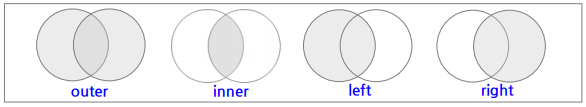

In [ ]:
df1 = pd.DataFrame( {'A' : [1,20,15,5],
                     'B' : list("XYZQ") },
                    index = list("abce") )
df2 = pd.DataFrame( {'C' : [10,20,15,40],
                     'B' : list("XYMN") },
                    index = list("abcd") )
df3 = pd.DataFrame( {'C' : [10,20,15,40],
                     'D' : list("XYMN") },
                    index = list("abcd") )
df4 = pd.DataFrame( {'C' : [10,20,15,40],
                     'D' : list("QXYZ") },
                    index = list("abcd") )

In [ ]:
display(df1, df2)

In [ ]:
pd.merge(df1, df2, on='B')

In [ ]:
pd.merge(df1, df2, on='B', how='outer')

In [ ]:
pd.merge(df1, df2, on='B', how='left')

In [ ]:
pd.merge(df1, df2, on='B', how='right')

In [ ]:
pd.merge(df1, df3, left_on='B', right_on='D')

In [ ]:
display(df1, df3)

In [ ]:
pd.merge(df1, df4, left_index=True, right_index=True)

In [ ]:
display(df1, df4)

## 3.데이터 삭제, 추가

### 3-01. 데이터 삭제
- x.drop(labels, axis=0, ...)
    - labels : 한 개의 label 또는 list-like index/column labels
    - axis=0 or 'index' : 행 삭제
    - axis=1 or 'columns' : 열 삭제
    - [DataFrame - drop](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html)

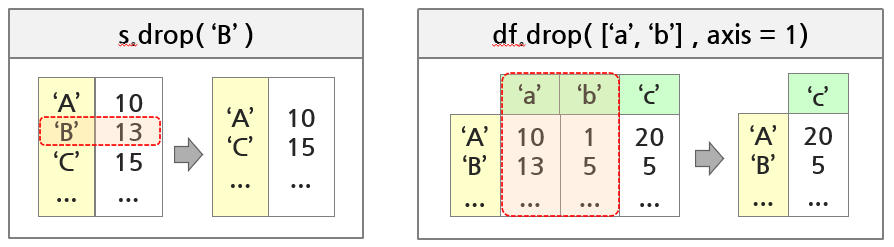

In [ ]:
s = pd.Series([10, 13, 15],
              index = list('ABB'))

# Series s에서 index 'B'에 해당하는 것을 삭제한다 (여러 개인 모두 제거)
s1 = # code here
display(s, s1)

In [ ]:
df = pd.DataFrame({'a': [10, 13],
                   'b': [1, 5],
                   'c': [20, 5]},
                  index = list('AB'))

# DataFrame df에서 columns 중 'a', 'b'를 삭제한다.
df1 = # code here
display(df, df1)

### 3-02. Do it yourself

In [ ]:
import shelve

# easySample에서 'sample3'을 key로 하는 객체(DataFrame)를 가져와 df라는 이름을 지정한다
mySample = shelve.open("easySample")
df = mySample['sample3']

# df에서 상위 5개 행을 출력한다


,pname,birth,dept,english,japanese,chinese,salary,overtime
ID,,,,,,,,
18030201,James Kim,1990-01-23,Education,1,1,0,3456,0 days 23:10:10
18030202,Rose Hwang,1992-10-11,Marketing,0,2,0,4320,0 days 10:15:17
19030401,Sam Park,1995-07-02,Education,1,0,0,5600,0 days 16:21:10
19070101,Chris Jang,1990-11-23,Education,0,0,3,4500,0 days 15:00:20
19070102,Grace Lee,1993-02-01,Marketing,0,0,0,3150,0 days 21:19:50


In [ ]:
# df의 columns 중에서 'pname', 'chinese', 'japanese', 'english'만 사용하는 df를 생성한다

# index를 기준으로 오름차순 정렬한다

# df에서 상위 5개 행을 출력한다


In [ ]:
# df에서 index가 18030202, 19070102, 19090202 인 행을 제거하여 df1이라는 이름을 붙인다


df1

In [ ]:
# df1에서 'chinese' 열을 제거하여 df2라는 이름을 붙인다

df2

### 3-03. 데이터 추가
- x.append(other, ignore_index=False, verify_integrity=False, ...)
   - other에 전달된 데이터를 추가한 객체 반환
   - other 
     - x is DataFrame : DataFrame, Series/dict-like, list of these
     - x is Series : Series or list/tuple of Series
   - ignore_index : True - index labels 사용하지 않음, index 없는 대상 추가 시 필수
   - verity_integrity : True - index 중복 시 ValueError 발생
   - [DataFrame - append](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.append.html)


In [ ]:
df1 = pd.DataFrame({'a' : [10, 13],
                    'b' : [1, 5]},
                    index = ['A', 'B'])
df2 = pd.DataFrame({'a' : [1, 3],
                    'b' : [4, 8]},
                    index = ['C', 'D'])
display(df1, df2)

,a,b
A,10,1
B,13,5


,a,b
C,1,4
D,3,8


In [ ]:
# df1에 df2를 추가하여 df3을 생성한다
df3 = df1.append(df2)
df3

,a,b
A,10,1
B,13,5
C,1,4
D,3,8


In [ ]:
df1 = pd.DataFrame({'a' : [10, 13],
                    'b' : [1, 5]},
                    index = ['A', 'B'])
df1

,a,b
A,10,1
B,13,5


In [ ]:
# index가 없어서 오류 발생
df2 = df1.append({'a':1, 'b':4})

In [ ]:
# ignore_index=True로 해결!
df2 = df1.append({'a':1, 'b':4}, ignore_index=True)
df2

,a,b
0,10,1
1,13,5
2,1,4


### 3-04. Do it yourself

In [ ]:
mySample = shelve.open("easySample")
df = mySample['sample3']    
df = df.sort_index()
df.head()

,pname,birth,dept,english,japanese,chinese,salary,overtime
ID,,,,,,,,
18030201,James Kim,1990-01-23,Education,1,1,0,3456,0 days 23:10:10
18030202,Rose Hwang,1992-10-11,Marketing,0,2,0,4320,0 days 10:15:17
19030401,Sam Park,1995-07-02,Education,1,0,0,5600,0 days 16:21:10
19070101,Chris Jang,1990-11-23,Education,0,0,3,4500,0 days 15:00:20
19070102,Grace Lee,1993-02-01,Marketing,0,0,0,3150,0 days 21:19:50


In [ ]:
# df.index를 출력하여 df의 index dtype을 확인한다


In [ ]:
# index에서 18로 시작하고, columns에서 'pname', 'chinese', 'japanese', 'english' 를 선택하여 df1이라는 이름을 붙인다.
# index에서 앞의 6글자는 날짜를 의미하고 마지막 2글자는 일련번호이다

df1

In [ ]:
df2 = pd.DataFrame({'pname' : ['Adam', 'Eve'],
                    'chinese' : [0, 1],
                    'japanese' : [1, 0],
                    'english' : [0, 0] },
                    index = [20101001, 18030201]) 
df2

In [ ]:
# df1 뒤에 df2를 추가하여 df3을 생성한다

# df3의 index를 정렬한다

df3

In [ ]:
# df1 뒤에 'pname' : 'HAHA', 'chinese' : 1, 'japanese' : 1, 'english' : 0 의 데이터를
# 추가하여 df4를 생성한다.
# dict를 사용하여 추가하고, ignore_index = True로 할 것

df4

## 4.데이터 변환

#### 4-01. Series.map

- s.map(arg, na_action=None)
   - arg로 전달된 내용이 ***각 항에 적용***된 Series 반환
- arg : function, dict, Series
   - Series의 각 항에 적용될 내용
   - dict가 사용될 경우 key에 없는 것이 Series에 포함되어 있으면 NaN이 됨 
- na_action : {None, 'ignore'}  (default None)
  - 'ignore' : NA Value에 대해 동작을 무시하고  NaN, None, NaT 로 채움
- API : [Series.map](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html)

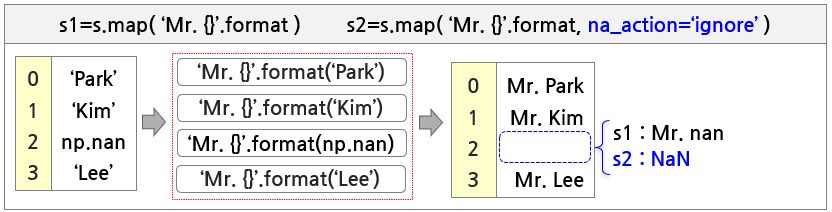

In [ ]:
s = pd.Series(['Park', 'Kim', np.nan, 'Lee', None, pd.NaT])

In [ ]:
# + 연산을 사용하여 s에 포함된 각 문자열을 앞에 'Mr.'을 붙은 문자열로 만든다


In [ ]:
# map을 사용하여 s에 포함된 각 문자열을 앞에 'Mr.'을 붙은 문자열로 만든다


In [ ]:
# map을 사용하여 s에 포함된 각 문자열을 앞에 'Mr.'을 붙은 문자열로 만든다
# 단, NA Value인 경우 'Mr.'을 붙이는 동작을 하지 않는다


In [ ]:
# map을 사용한 치환
s = pd.Series([10, 10, 30, 10, 20])
# map에 dict를 전달하여 10을 0으로 20을 1로 변경한다
# 처리방법이 기술되지 않은 데이터는 NaN으로 표시됨


In [ ]:
# replace를 사용한 치환
# replace는 처리방법이 기술되지 않은 데이터를 그대로 둔다


#### 4-02. 성적처리


In [ ]:
s = pd.Series([75, 66, 120, 80, 100, 95, 50],name='score')
df = pd.DataFrame(s)
df.index.name = 'number'
df

In [ ]:
# df에 'grade'라는 column을 추가한다
# 'grade'의 values는 'df.score'를 사용하여 구하며, 세부조건은 다음과 같다
# 0~100 점 사이의 데이터가 아닌 경우 'Error'
# 100~90 : 'A', 89~80 : 'B', 79~70 : 'C', 69~60 : 'D', 59~0 : 'F' 




#### 4-03. 부서별 코드 번호 부여

In [ ]:
with shelve.open("easySample") as data :
  df = data['sample3']
  df = df.loc[:, ['pname', 'dept', 'salary', 'overtime']]

df

In [ ]:
# df에 'dept_code'라는 column을 추가한다
# 'dept_code'는 dept에 1부터 시작하여 1씩 증가하는 일련번호를 부여한 것이다
# 단, 부서명의 알파벳순(오름차순)에 따라 번호가 부여된다




#### 4-04. overtime 금액 계산

In [ ]:
# df의 'overtime'에 대해서 금액을 산정해 salary에 더한다
# overtime 계산은 1일 100, 1시간 5로 계산한다
# 단 overtime이 10시간 미만인 경우는 금액을 지불하지 않는다
# salary에 더한 뒤에는 overtime을 0으로 변경한다
with shelve.open("easySample") as data :
  df = data['sample3']
  df = df.loc[:, ['pname', 'dept', 'salary', 'overtime']]

# Accessors


#### 4-05. DataFrame/Series.apply
- x.apply( func, axis, ...,  args=(), **kwds )  # x : DataFrame, Series
- axis에 설정에 따라 행/열 별로 func에 주어진 함수를 적용한 결과 반환
- func : 각 행이나 열에 적용할 함수
   - 함수는 lambda로 작성하거나 numpy, Series 등에서 제공되는 것 사용
   - apply는 행/열에 함수를 적용 함  (map은 각 항에 함수를 적용)
- axis : 0 or ‘index : 각 column 에 적용, 1 or ‘columns’ : 각 row에 적용
- args : array 또는 Series를 포함한 tuple로 작성
   - func에 전달 할 Positional arguments
- kwds  
   - func에 전달 할 Keyword arguments
- API : [DataFrame.apply](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html)

In [ ]:
np.random.seed(1000)
df = pd.DataFrame(np.random.randint(50, 100, (4, 3)),
                  columns = list('ABC'))
df

In [ ]:
# df의 열별 합계를 구한다


In [ ]:
# df.apply의 사용하여 열별 합계를 구한다


In [ ]:
# df.apply의 사용하여 행별 최소값을 구한다
df.apply(min, axis=1)

In [ ]:
# df.apply의 사용하여 열별 합계, 최소, 최대를 구한다
df.apply([sum, min, max])

#### 4-06. 13 aggregating functions available in Pandas
- mean(): Compute mean of groups
- sum(): Compute sum of group values
- size(): Compute group sizes
- count(): Compute count of group
- std(): Standard deviation of groups
- var(): Compute variance of groups
- sem(): Standard error of the mean of groups
- describe(): Generates descriptive statistics
- first(): Compute first of group values
- last(): Compute last of group values
- nth() : Take nth value, or a subset if n is a list
- min(): Compute min of group values
- max(): Compute max of group values

In [ ]:
df = shelve.open("easySample")['sample3']
df = df.loc[:, ['english', 'chinese', 'japanese']]
df

In [ ]:
# ID별로 가지고 있는 어학 등급의 개수
df.apply(np.count_nonzero, axis=1)   # transform

In [ ]:
# 어학종목별 등급의 개수
df.apply(pd.Series.value_counts)     # transform

In [ ]:
#df.apply([pd.Series.value_counts, min])

### 4-07. 범주화 (pd.cut)
- pd.cut(x, bins, right, labels, ...)
- 연속 데이터를 구간별 범주화 함
- https://pandas.pydata.org/docs/reference/api/pandas.cut.html

In [ ]:
import pandas as pd
ages = [0, 15, 10, 21, 23, 37, 31, 61, 20, 41, 32, 100]
bins = [0, 15, 25, 35, 60, 100]
labels = ['어린이', '청년', '장년', '중년', '노년']

cats = pd.cut(ages, bins, right=False, labels = labels)
print(cats)
print('code:', cats.codes)
print('categories:', cats.categories)

## 5.데이터의 그룹별 작업 
- 작업 목적에 따른 분류
1. Aggregation
  - 각 그룹에 함수 적용 후, 그룹별 함수 결과 형태의 객체 반환
  - 예) 그룹별 합계, 평균, 개수 구하기
2. Transformation
  - 각 그룹에 함수 적용 후, index-like 객체 반환
  - 예) 그룹 내 데이터 표준화, 각 그룹별 산출 값으로 NA Value 채우기
3. Filtration
  - 각 그룹에 함수 적용 후, 그 결과가 True 인 것만 남김(False인 것 삭제)
  - 예) 데이터 개수가 적은 그룹 제거, 합계, 평균 등에 기반한 데이터 추출

  

In [ ]:
# Aggregation : 그룹별 함수결과 형태의 객체 반환 : dept별 salary 평균
# Transformation : index-like 객체 반환 : dept별 salary 평균
# Filtration : 결과가 True 인 것만 남긴 객체 반환 : dept별 salary 평균이 전체 평균 초과

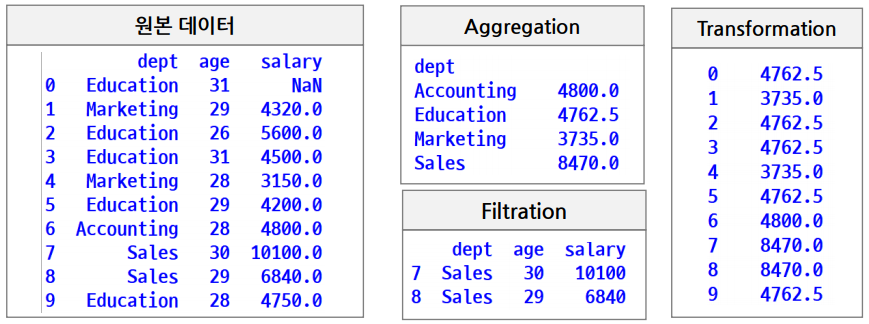

### 5-01. groupby 작업
- df.groupby( by=None, axis=0, level=None, sort=True, as_index=True,...)
- by/level 에 의해 그룹화된 DataFrameGroupBy / SeriesGroupBy 객체 반환
- by : mapping, function, label or list of labels
   - function의 경우 객체의 index 각 항을 대상으로 함 
- axis : 0인 경우 행, 1인 경우 열 기준으로 그룹 나누기 작업 진행
- level : MultiIndex인 경우 level을 기준으로 그룹 나누기
- sort : 정렬할 것인지 결정하는 것으로  False가 성능면에서 좋음
- as_index : True인 경우 group_label을 index로 사용함
- https://pandas.pydata.org/pandas-docs/stable/reference/groupby.html
- https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html

In [ ]:
mySample = shelve.open("easySample")
    
def makeSample4():
    df = mySample['sample3']
    df['dept'] = df['dept'].astype(np.object)
    df['age']  = df['birth'].map(lambda x : 2020 - x.year + 1)
    df['gender'] = pd.Series( np.array(list('MFMMFFMMMF')),
                           index = df.index )
    df.index = pd.RangeIndex(len(df))
    mySample['sample4'] = df
    print('Done!!! make sample4')
    return df

df = makeSample4()
mySample.close()

Done!!! make sample4


In [ ]:
with shelve.open('easySample') as mySample:
    df = mySample['sample4']

df

In [ ]:
# df.info()를 수행하여 각 column의 d type을 확인한다.  (df.dtypes 도 사용가능)
# categorical 섞여 있으면 안됨


In [ ]:
# df.groupby('dept)를 수행하여 return type을 확인한다.


In [ ]:
df = df[['pname', 'dept', 'salary', 'overtime', 'age', 'gender']]
# 'dept' 별로 group를 만든 뒤, 각 그룹의 이름과, 그룹별 DataFrame을 출력해 보자


'Accounting'

,pname,dept,salary,overtime,age,gender
6,Chirle Song,Accounting,4800,0 days 09:50:30,28,M


--------------------------------------------------


'Education'

,pname,dept,salary,overtime,age,gender
0,James Kim,Education,3456,0 days 23:10:10,31,M
2,Sam Park,Education,5600,0 days 16:21:10,26,M
3,Chris Jang,Education,4500,0 days 15:00:20,31,M
5,Juile Yoon,Education,4200,0 days 14:10:40,29,F
9,Anne Lee,Education,4750,0 days 19:50:20,28,F


--------------------------------------------------


'Marketing'

,pname,dept,salary,overtime,age,gender
1,Rose Hwang,Marketing,4320,0 days 10:15:17,29,F
4,Grace Lee,Marketing,3150,0 days 21:19:50,28,F


--------------------------------------------------


'Sales'

,pname,dept,salary,overtime,age,gender
7,Bob Kim,Sales,10100,0 days 08:40:40,30,M
8,John Park,Sales,6840,0 days 17:30:20,29,M


--------------------------------------------------


In [ ]:
# 'dept' 별로 group를 만든 뒤, 'Education'에 대한 DataFrame만 출력해 보자
# get_group('group_name') 사용



,pname,dept,salary,overtime,age,gender
0,James Kim,Education,3456,0 days 23:10:10,31,M
2,Sam Park,Education,5600,0 days 16:21:10,26,M
3,Chris Jang,Education,4500,0 days 15:00:20,31,M
5,Juile Yoon,Education,4200,0 days 14:10:40,29,F
9,Anne Lee,Education,4750,0 days 19:50:20,28,F


In [ ]:
# 그룹별 작업은 다음 단계를 거쳐 결과를 만들어 낸다
1. Splitting : 그룹 분류 기준에 따라 데이터를 그룹으로 분리
2. Applying : 각 그룹별로 연산 적용
3. Combining : applying의 결과를 하나의 데이터 구조로 결합

- Aggregation 작업

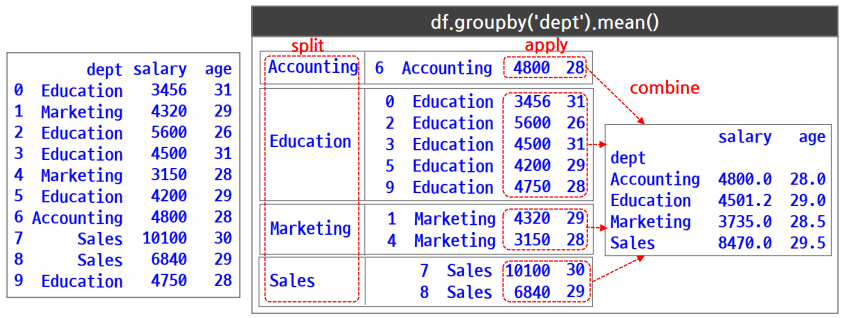

In [ ]:
# 'dept' 별로 group를 만든 뒤, 각 그룹별 평균을 구해보자


,salary,age
dept,,
Accounting,4800.0,28.0
Education,4501.2,29.0
Marketing,3735.0,28.5
Sales,8470.0,29.5


In [ ]:
# 'dept' 별로 group를 만든 뒤, 'salary'에 대해서만 각 그룹별 평균을 구해보자


In [ ]:
# 위의 두 줄을 한 줄로 작성한 것
# 'dept' 별로 group를 만든 뒤, 'salary'에 대해서만 각 그룹별 평균을 구해보자



In [ ]:
# 'dept' 별로 group를 만든 뒤, 각 그룹별 평균을 구하고 'salary'만 추출한다
# 순서만 다르고 결과는 같음


In [ ]:
# apply 함수를 사용하여 각 그룹별 'salary' 평균을 구함 (결과는 동일)


In [ ]:
# 'dept'별로 'age', 'salary'에 대해 평균을 구함


,age,salary
dept,,
Accounting,28.0,4800.0
Education,29.0,4501.2
Marketing,28.5,3735.0
Sales,29.5,8470.0


In [ ]:
# 'dept'별로 'age'에 대한 평균을 구하여 DataFrame으로 작성


,age
dept,
Accounting,28.0
Education,29.0
Marketing,28.5
Sales,29.5


In [ ]:
with shelve.open("easySample") as mySample:
    df = mySample['sample4']
    df1 = df.loc[:, ['dept', 'salary', 'chinese', 'gender']]

In [ ]:
# 'chinese'의 등급별 개수 세기


chinese
0    5
1    3
2    1
3    1
Name: chinese, dtype: int64

In [ ]:
# 'dept', 'gender'별 인원 세기  


dept        gender
Accounting  M         1
Education   F         2
            M         3
Marketing   F         2
Sales       M         2
Name: chinese, dtype: int64

In [ ]:
# 'dept', 'gender'별 인원 세기  


dept        gender
Accounting  M         1
Education   M         3
            F         2
Marketing   F         2
Sales       M         2
Name: gender, dtype: int64

In [ ]:
df3 = df.loc[:, ['dept', 'age', 'gender', 'salary']]

In [ ]:
# 연령대별 'gender'의 인원수 세기
# 연령대를 만드는 작업을 위해 'age'를 index로 변경 한 뒤, 
# 함수를 argument로 하는 groupby사용



    gender
20  F         4
    M         3
30  M         3
Name: gender, dtype: int64

In [ ]:
# 'gender', 'dept'를 index로 설정 후,
# groupby의 level parameter에 [1, 0]을 지정하여 'dept'별, 'gender'별 
# 'salary'의 평균을 구한다


dept        gender
Accounting  M         4800.000000
Education   F         4475.000000
            M         4518.666667
Marketing   F         3735.000000
Sales       M         8470.000000
Name: salary, dtype: float64

In [ ]:
# 'gender', 'dept'를 index로 설정 후,
# groupby의 level parameter에 [0]을 지정하여 'gender'별 
# 'age'의 평균을 구한다


gender
F    28.500000
M    29.166667
Name: age, dtype: float64

### 5-02. grouptby의 function 관련 메서드
- ```gp.apply(func, *args, **kwargs)```
   - 그룹별로 func을 적용하고 결과를 combine함
   - func의 argument : group별 DataFrame 객체
   - 결과로 DataFrame/Series 객체 반환 (변경된 index)

- ```gp.agg(func, axis=0, *args, **kwargs)```
   - func : function, str, list or dict
   - 함수 실행시 각 그룹별 DataFrame의 각 Series 객체(column)를 인수로 받음
   - 결과로 DataFrame 또는 Series 반환 (변경된 index)

- ```gp.transform(func)```
   - DataFrame 형식을 유지하면서 결과를 구함 (index 유지)

- ```gp.filter(func, dropna=True, *args, *kwargs)```
   - 특정 조건으로 데이터를 검색(추출)할 때 사용
   - func : True/False를 반환하는 형태여야 함
   - dropna : func의 결과가 False인 것에 대해 삭제할 것인가의 여부, dropna=False인 경우 False인 것을 NaN으로 채움
   - filter된 DataFrame 반환 (변경된 index)      

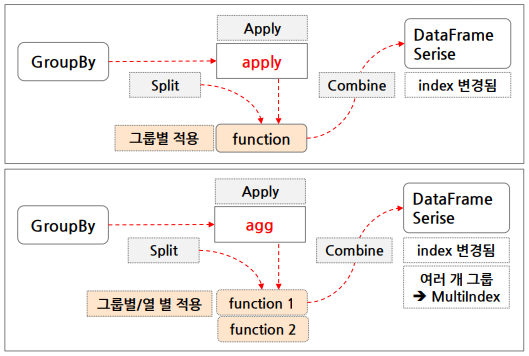

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
with shelve.open("easySample") as mySample:
    df = mySample['sample4']
df    

,pname,birth,dept,english,japanese,chinese,salary,overtime,age,gender
0,James Kim,1990-01-23,Education,1,1,0,3456,0 days 23:10:10,31,M
1,Rose Hwang,1992-10-11,Marketing,0,2,0,4320,0 days 10:15:17,29,F
2,Sam Park,1995-07-02,Education,1,0,0,5600,0 days 16:21:10,26,M
3,Chris Jang,1990-11-23,Education,0,0,3,4500,0 days 15:00:20,31,M
4,Grace Lee,1993-02-01,Marketing,0,0,0,3150,0 days 21:19:50,28,F
5,Juile Yoon,1992-07-16,Education,0,0,1,4200,0 days 14:10:40,29,F
6,Chirle Song,1993-04-11,Accounting,2,0,0,4800,0 days 09:50:30,28,M
7,Bob Kim,1991-12-07,Sales,1,1,1,10100,0 days 08:40:40,30,M
8,John Park,1992-06-16,Sales,3,1,2,6840,0 days 17:30:20,29,M
9,Anne Lee,1993-05-05,Education,0,3,1,4750,0 days 19:50:20,28,F


In [ ]:
df1 = df.loc[:, ['dept', 'chinese', 'japanese']]
what = lambda x : (x.shape, type(x))  #np.where(x>0, 1, 0).sum()
grade = lambda x : np.where(x>0, 1, 0).sum()

# s1, s2, s3의 출력을 통해 apply, agg의 차이점을 확인하라
# apply의 대상은 누구인가? 
# agg의 대상은 누구인가? 

s1 = df1.groupby('dept', sort=True).apply(what)
s2 = df1.groupby('dept', sort=True).apply(grade)
s3 = df1.groupby('dept', sort=True).agg([what, grade])
display(s1, s2, s3)

dept
Accounting    ((1, 3), <class 'pandas.core.frame.DataFrame'>)
Education     ((5, 3), <class 'pandas.core.frame.DataFrame'>)
Marketing     ((2, 3), <class 'pandas.core.frame.DataFrame'>)
Sales         ((2, 3), <class 'pandas.core.frame.DataFrame'>)
dtype: object

dept
Accounting    0
Education     5
Marketing     1
Sales         4
dtype: int64

chinese  ...   japanese
                                             <lambda_0>  ... <lambda_1>
dept                                                     ...           
Accounting  ((1,), <class 'pandas.core.series.Series'>)  ...          0
Education   ((5,), <class 'pandas.core.series.Series'>)  ...          2
Marketing   ((2,), <class 'pandas.core.series.Series'>)  ...          1
Sales       ((2,), <class 'pandas.core.series.Series'>)  ...          2

[4 rows x 4 columns]

In [ ]:
df2 = df.loc[:, ['dept', 'age', 'salary']]
# df2에서 'dept'별 'age', 'salary'의 min, max를 구한다

s1

age     salary       
           min max    min    max
dept                            
Accounting  28  28   4800   4800
Education   26  31   3456   5600
Marketing   28  29   3150   4320
Sales       29  30   6840  10100

In [ ]:
df3 = df.loc[:, ['dept', 'age', 'salary']]
# df3에서 'dept'별 'age'의 min, max와 , 'salary'의 np.sum, len, np.mean을 구한다
s1 = df3.groupby('dept').agg( {'age' : [min, max],
                               'salary' : [np.sum, len, np.mean]})
s1

age     salary            
           min max    sum len    mean
dept                                 
Accounting  28  28   4800   1  4800.0
Education   26  31  22506   5  4501.2
Marketing   28  29   7470   2  3735.0
Sales       29  30  16940   2  8470.0

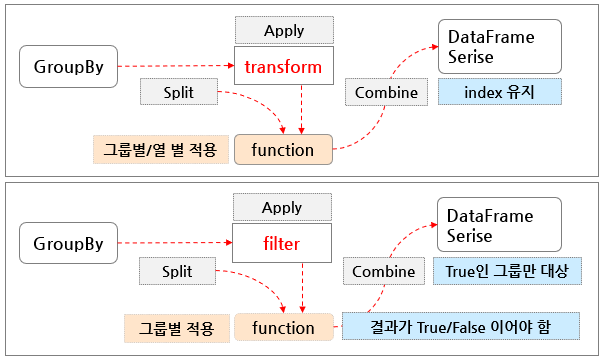

In [ ]:
df4 = df.loc[:, ['dept', 'age', 'gender','salary']]
# 0번 index의 'salary' 를 np.nan으로 만들어 둔다
df4.loc[0, 'salary'] = np.nan
df4.head(3)

,dept,age,gender,salary
0,Education,31,M,NaN
1,Marketing,29,F,4320.0
2,Education,26,M,5600.0


In [ ]:
df4

,dept,age,gender,salary
0,Education,31,M,NaN
1,Marketing,29,F,4320.0
2,Education,26,M,5600.0
3,Education,31,M,4500.0
4,Marketing,28,F,3150.0
5,Education,29,F,4200.0
6,Accounting,28,M,4800.0
7,Sales,30,M,10100.0
8,Sales,29,M,6840.0
9,Education,28,F,4750.0


In [ ]:
# transform의 특성을 확인하기 위해 what을 실행해 x가 Series인 경우 True 아니면 False가 출력되도록 한다
# True가 표시되었으므로 x는 group별 DataFrame의 column별 전달이 되는 것이다.  

what = lambda x : True if type(x) == pd.Series else False  #sum(x)
r1 = df4.groupby('dept').transform(what)
r1

,age,gender,salary
0,True,True,True
1,True,True,True
2,True,True,True
3,True,True,True
4,True,True,True
5,True,True,True
6,True,True,True
7,True,True,True
8,True,True,True
9,True,True,True


In [ ]:
# filter의 특성을 이해하기 위해 what1을 전달해 본다
# 전체 데이터가 출력된다면, group별 DataFrame이 x에 전달되는 것이다.
what1 = lambda x : True if type(x) == pd.DataFrame else False
r2 = df4.groupby('dept').filter(what1)
r2

,dept,age,gender,salary
0,Education,31,M,NaN
1,Marketing,29,F,4320.0
2,Education,26,M,5600.0
3,Education,31,M,4500.0
4,Marketing,28,F,3150.0
5,Education,29,F,4200.0
7,Sales,30,M,10100.0
8,Sales,29,M,6840.0
9,Education,28,F,4750.0


In [ ]:
# 'dept'별로  길이가 2보다 큰 것에 대해서만 True를 적용해 본다
what2 = lambda x : # code here
r3 = df4.groupby('dept').filter(what2)
display(r3, len(r3))

In [ ]:
# 'deat', 'gender' 별 그룹의 'salary' 평균을 구한다.



dept        gender
Accounting  M         4800.0
Education   F         4475.0
            M         5050.0
Marketing   F         3735.0
Sales       M         8470.0
Name: salary, dtype: float64

In [ ]:
# 'dept', 'gender' 별 그룹의 'salary' 평균을 transform을 사용해 구한 뒤, df4의 's_mean' column으로 추가한다.
df4['s_mean'] = 

# 'salary'가 NaN으로 되어 있는 것에 대해 's_mean'의 값으로 채우기 한다.
df4['salary'] = 
df4.head(3)

,dept,age,gender,salary,s_mean
0,Education,31,M,5050.0,5050.0
1,Marketing,29,F,4320.0,3735.0
2,Education,26,M,5600.0,5050.0


In [ ]:
df5 = df.loc[:, ['dept', 'age', 'gender', 'salary']]
# df5에 대해 'dept'그룹별로 'gender'가 'M', 'F' 모두 존재하는 경우만 추출한다.



,dept,age,gender,salary
0,Education,31,M,3456
2,Education,26,M,5600
3,Education,31,M,4500
5,Education,29,F,4200
9,Education,28,F,4750


### 5-03. MultiIndex 생성 및 구조 변경

- ```pd.MultiIndex.from_product(iterables, names)```
   - iterables와 names를 사용하여 MultiIndex를 생성한다
   - iterables : MultiIndex 각 column을 항으로 하는 1D array
   - names : index의 각 column 이름, 1D array
   - 각 항의 개수를 곱한 것 만큼의 항이 생성됨
- ```pd.MultiIndex.from_tuples(tuple, names)```
   - tuple과 names를 사용하여 MultiIndex를 생성한다
   - tuples : MultiIndex 각 row를 항으로 하는 1D array
   - names : index의 각 column 이름, 1D array

In [ ]:
# idx_p = [ ['A', 'B', 'C'], [1, 2]]
idx_p  = [list('ABC'), [1, 2]]
midx2  = 
midx2

MultiIndex([('A', 1),
            ('A', 2),
            ('B', 1),
            ('B', 2),
            ('C', 1),
            ('C', 2)],
           names=['L0', 'L1'])

In [ ]:
# tuples = [ ('A', 1), ('A', 2), ('B', 1), ('B', 2), ('C', 1), ('C', 2) ]
tuples = [(a, b) for a in list('ABC') for b in range(1,3)]
midx1  = 
midx1

MultiIndex([('A', 1),
            ('A', 2),
            ('B', 1),
            ('B', 2),
            ('C', 1),
            ('C', 2)],
           names=['L0', 'L1'])

- ```df.unstack(level=-1, fill_value=None)```
   - index 에서 column 으로 level 이동하여 새로 구성된 index를 갖는 DataFrame 반환
   - index labels의 values는 unique 해야 하며, 재구성시 자동 정렬됨
   - columns의 모든 level이 unstack되면 Series 가 반환되며, index labels는 정렬되지 않음
   - level : int, string, or list of these (default : -1 : last level)
   - fill_value : NA Value 를 대체할 값 (기본은 사용하지 않음)






In [ ]:
midx = pd.MultiIndex.from_product([list('BA'), list('bca')])
df = pd.DataFrame(np.random.randint(60, 100, (6, 2)),
                    index = midx,
                    columns = list('MF'))    
df

M   F
B b  87  96
  c  96  80
  a  90  84
A b  90  88
  c  90  73
  a  78  88

In [ ]:
# df의 index에서 level 0을 columns 쪽으로 이동한다
df1 =  #df2 = df.unstack(-2)도 동일한 동작을 한다
df1

M       F    
    A   B   A   B
a  78  90  88  84
b  90  87  88  96
c  90  96  73  80

In [ ]:
# df의 index에서 level 1을 columns 쪽으로 이동한다
df2 =    #df2 = df.unstack(-1)도 동일 동작을 한다
df2

M           F        
    a   b   c   a   b   c
A  78  90  90  88  88  73
B  90  87  96  84  96  80

In [ ]:
# df의 index에서 level 0, 1 모두를 columns로 이동한다
s   = 
s

M  B  b    87
      c    96
      a    90
   A  b    90
      c    90
      a    78
F  B  b    96
      c    80
      a    84
   A  b    88
      c    73
      a    88
dtype: int64

- ```df.stack(level=-1, dropna = True)```
   - columns 에서 index 로 level 이동하여 새로 구성된 index를 갖는 DataFrame 반환
   - columns의 values는 unique 해야 하며, 재구성시 자동 정렬됨
   - columns의 모든 level이 stack되면 Series가 반환됨
   - level : int, str, list (default  -1)
   - dropna : stack의 결과 중 NA Value를 삭제할지 설정 (기본은 삭제처리)

In [ ]:
midx = pd.MultiIndex.from_product([list('BA'), list('bca')])
df = pd.DataFrame(np.random.randint(60, 100, (2, 6)),
                    index = list('MF'),
                    columns = midx)    
df

B           A        
    b   c   a   b   c   a
M  81  89  70  90  74  65
F  72  71  71  92  81  86

In [ ]:
# df의 columns에서 index로 level 0을 이동한다
df1 = 
df1

a   b   c
M A  65  90  74
  B  70  81  89
F A  86  92  81
  B  71  72  71

In [ ]:
# df의 columns에서 index로 level 1을 이동한다
df2 = 
df2

A   B
M a  65  70
  b  90  81
  c  74  89
F a  86  71
  b  92  72
  c  81  71

In [ ]:
# df의 columns에서 index로 level 0, 1을 이동한다
df3 = 
df3

M  A  a    65
      b    90
      c    74
   B  a    70
      b    81
      c    89
F  A  a    86
      b    92
      c    81
   B  a    71
      b    72
      c    71
dtype: int64

- ```MultiIndex.droplevel(level=0)```
   - level 에 표기된 level을 index 또는 columns에서 제거함, 적어도 1개 이상이 남아야 함
   - level : int, str, list-like, (default : 0)) 로 제거할 index 
   - axis=0 또는 ‘index’ : index의 level 제거
   - axis=1 또는 ‘columns’ : columns의 level 제거
   - index의 level 제거시에는 df.index 를 사용하여 label 변경이 가능함
   - columns의 level 제거시에는 df.columns 를 사용하여 label 변경이 가능함

In [ ]:
midx1 = pd.MultiIndex.from_product([list('AB'), list('ab')])
midx2 = pd.MultiIndex.from_product([list('MF'), list('cd')])
df = pd.DataFrame(np.random.randint(60, 100, (4, 4)),
                    index = midx1, columns = midx2)  
df

M       F    
      c   d   c   d
A a  96  67  76  83
  b  88  60  91  90
B a  78  61  71  87
  b  83  75  77  65

In [ ]:
# df의 index의 level 0번을 제거한다
df1 = 
df1        

M       F    
    c   d   c   d
a  96  67  76  83
b  88  60  91  90
a  78  61  71  87
b  83  75  77  65

In [ ]:
# df의 columns의 level 1번을 제거한다
df2 = 
df2

M   M   F   F
A a  96  67  76  83
  b  88  60  91  90
B a  78  61  71  87
  b  83  75  77  65

### 5-04. pivot 작업
- df.pivot(index=None, columns=None, values=None)
- index : column, Grouper, array or list of the previous
   - 피벗 테이블 행 index가 될 column 명
- columns : column, Grouper, array, or list of the previous
   - 피벗 테이블 열 index가 될 column 명
- values : columns to aggregate
   - 집계 대상 column, 수치 데이터
- index/columns의 쌍이 중복되면 안됨
- heatmap 그래프 작성시 사용함

In [ ]:
# seaborn 라이브러리에서 'flights' 데이터셋을 가져옴
import seaborn as sns
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [ ]:
# flights를 사용하여 index를 'month', columns를 'year', values 를 'passengers'로 하는 pivot 생성하여 이름을 flightpivot으로 정한다
flightpivot = 
flightpivot

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


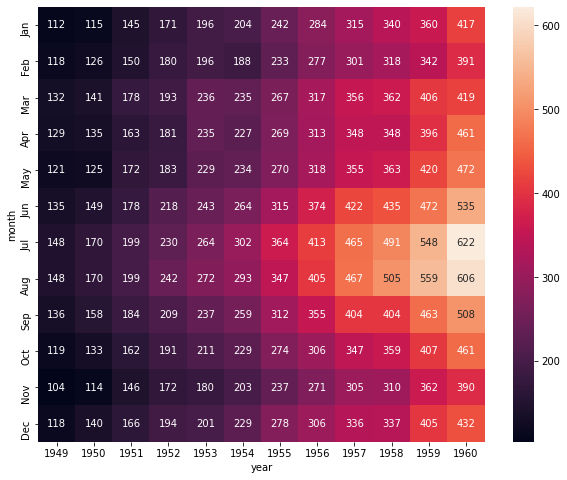

In [ ]:
# heatmap 그래프 그리기
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(flights, annot=True, fmt="d")
plt.show()

### 5-03. PivotTable
- 피벗 테이블을 데이터를 요약하는 통계표이다
- 유용한 정보에 집중할 수 있도록 하기 위해 통계를 정렬 또는 재정렬함
- df.pivot_table(values=None, index=None, columns=None, aggfunc=‘mean’, 
fill_value = None, ...)  -> DataFrame
- spreadsheet 스타일의 pivot table을 형태의 DataFrame을 반환함
- pivot table의 level은 결과 DataFrame의 열과 index의 MultiIndex 로 저장됨
- values : columns to aggregate
   - 집계 대상 column, 수치 데이터
- index : column, Grouper, array or list of the previous
   - 피벗 테이블 행 index가 될 column 명
- columns : column, Grouper, array, or list of the previous
   - 피벗 테이블 열 index가 될 column 명
- aggfunc : function, list of functions, dict, default numpy.mean
   - 집계함수 지정 - sum, mean, min, max, std, var 등
- fill_value : scalar, default None
   - missing value를 채우기 할 값

- Categorical이 섞여 있으면 안됨

In [ ]:
with shelve.open("easySample") as mySample:
    df = mySample['sample4']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype          
---  ------    --------------  -----          
 0   pname     10 non-null     object         
 1   birth     10 non-null     datetime64[ns] 
 2   dept      10 non-null     object         
 3   english   10 non-null     int32          
 4   japanese  10 non-null     int32          
 5   chinese   10 non-null     int32          
 6   salary    10 non-null     int32          
 7   overtime  10 non-null     timedelta64[ns]
 8   age       10 non-null     int64          
 9   gender    10 non-null     object         
dtypes: datetime64[ns](1), int32(4), int64(1), object(3), timedelta64[ns](1)
memory usage: 768.0+ bytes


In [ ]:
# 'english', 'japanese', 'chinese'에 대해서 'dept'별 등급 취득 인원에 대한 피벗테이블 작성
# 인원 수를 셀때는 np.count_nonzero 를 사용하여 0을 제외하고 인원을 세도록 한다.
pivot = 
pivot

,chinese,english,japanese
dept,,,
Accounting,0,1,0
Education,3,2,2
Marketing,0,0,1
Sales,2,2,2


In [ ]:
# 'age', 'salary'에 대해서 'gender'별로 'age'의 평균(mean)과 'salary'의 max를 구하는 피벗테이블 작성
pivot = 
pivot

,age,salary
gender,,
F,28.500000,4750
M,29.166667,10100


In [ ]:
# 'age', 'salary'에 대해서 'dept'별로
# 'gender'별 'age'의 max와 'salary'의 min을 구하는 피벗 테이블을 작성하며, NaN 값은 0으로 채우기 한다.
pivot = df.pivot_table(  )
pivot

age     salary      
gender       F   M      F     M
dept                           
Accounting   0  28      0  4800
Education   29  31   4200  3456
Marketing   29   0   3150     0
Sales        0  30      0  6840

## 6.여러 가지 통계량 출력, 상관관계 분석
- x.describe(percentiles=None, ...)
   - DataFrame/Series의 숫자 형 변수에 대한 여러 가지 통계량 출력
   - 개수, 평균값, 표준편차, 최솟값, 1, 2 (중앙값), 3사분위 수, 최대값
   - percentiles : 새로운 index 생성에 사용할 column/column 목록(columns labels로 작성)
- df.corr()
   - 상관관계를 분석하는 것으로 -1은 반비례, 1은 정비례를 의미하고 0은 상관관계가 없음을 의미함
   - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
- df.quantile()
   - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.quantile.html   

In [ ]:
with shelve.open("easySample") as mySample:
    df = mySample['sample4']
df = df[['english', 'salary', 'age']]
df

,english,salary,age
0,1,3456,31
1,0,4320,29
2,1,5600,26
3,0,4500,31
4,0,3150,28
5,0,4200,29
6,2,4800,28
7,1,10100,30
8,3,6840,29
9,0,4750,28


In [ ]:
df.describe()

,english,salary,age
count,10.000000,10.000000,10.000000
mean,0.800000,5171.600000,28.900000
std,1.032796,2019.968933,1.523884
min,0.000000,3150.000000,26.000000
25%,0.000000,4230.000000,28.000000
50%,0.500000,4625.000000,29.000000
75%,1.000000,5400.000000,29.750000
max,3.000000,10100.000000,31.000000


In [ ]:
df.describe([0.2, 0.5, 0.9])

,english,salary,age
count,10.000000,10.000000,10.000000
mean,0.800000,5171.600000,28.900000
std,1.032796,2019.968933,1.523884
min,0.000000,3150.000000,26.000000
20%,0.000000,4051.200000,28.000000
50%,0.500000,4625.000000,29.000000
90%,2.100000,7166.000000,31.000000
max,3.000000,10100.000000,31.000000


In [ ]:
df.corr()

,english,salary,age
english,1.000000,0.420922,-0.084717
salary,0.420922,1.000000,0.060771
age,-0.084717,0.060771,1.000000


In [ ]:
df.quantile([0.25, 0.5, 0.75])